### Redukcja wymiarowości

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [2]:
ds = load_breast_cancer()
ds.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(ds.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df.head(4)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [5]:
# import klasy odpowiedzialnej za PCA
from sklearn.decomposition import PCA

In [10]:
N_DIM = 5
pca = PCA(n_components=N_DIM, random_state=0)
X_pca = pca.fit_transform(df)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [12]:
#%%timeit -r 10 -n 100
# estymator na danych oryginalnych

X_train, X_test, y_train, y_test = train_test_split(df, ds.target, test_size=.2, random_state=0)
model = DecisionTreeClassifier(max_depth=7, random_state=0)
model.fit(X_train, y_train)
#print(model.score(X_test, y_test))
#pd.DataFrame( confusion_matrix(y_test, model.predict(X_test)) )

DecisionTreeClassifier(max_depth=7, random_state=0)

In [13]:
#%%timeit -r 10 -n 100
# estymator na danych PCA

X_train, X_test, y_train, y_test = train_test_split(X_pca, ds.target, test_size=.2, random_state=0)
model = DecisionTreeClassifier(max_depth=7, random_state=0)
model.fit(X_train, y_train)
#print(model.score(X_test, y_test))
#pd.DataFrame( confusion_matrix(y_test, model.predict(X_test)) )

DecisionTreeClassifier(max_depth=7, random_state=0)

<AxesSubplot:>

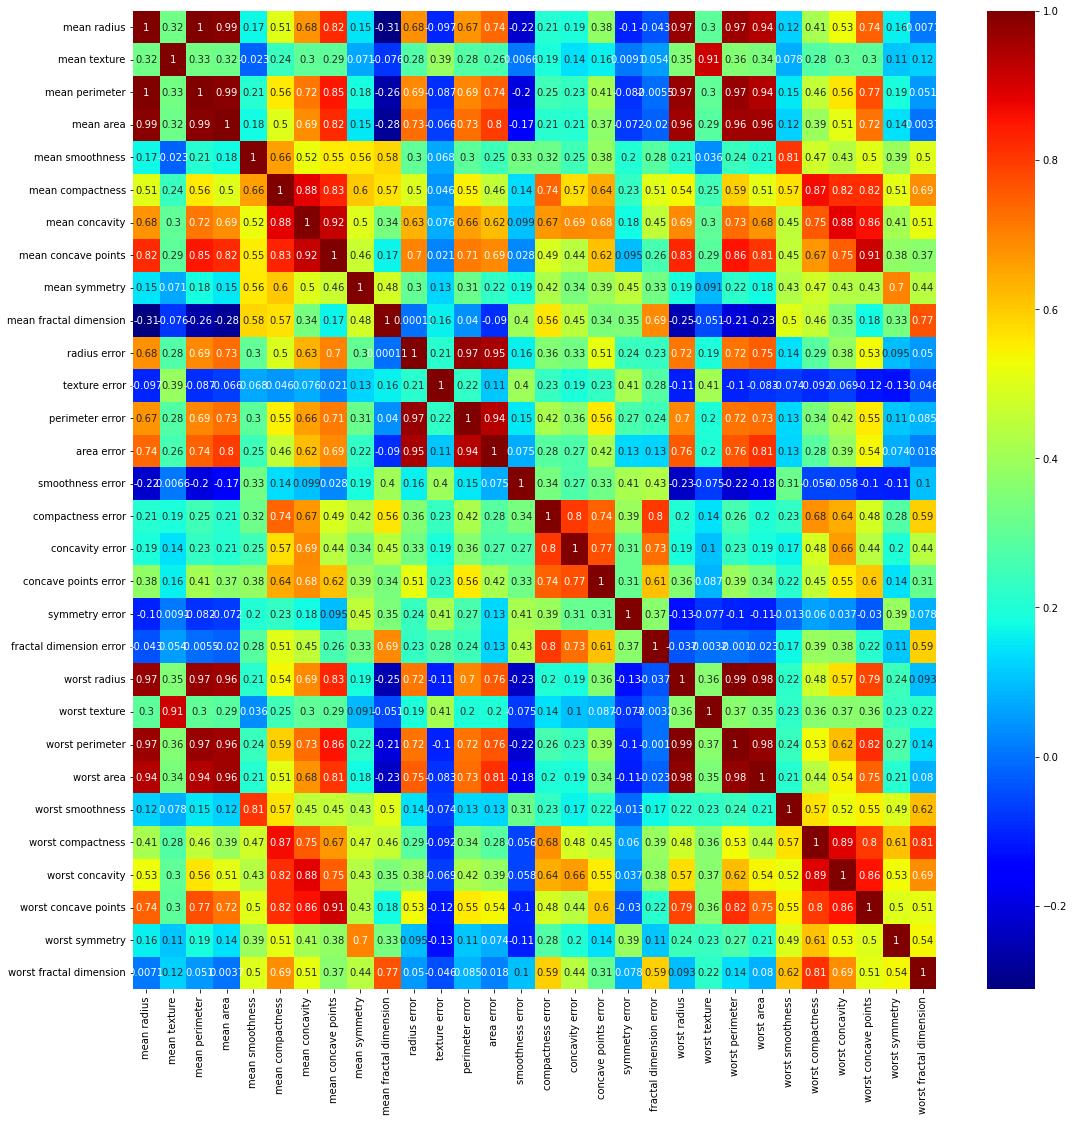

In [15]:
plt.figure(figsize=(18,18))
sns.heatmap( df.corr(), annot=True, cmap="jet" )

<AxesSubplot:>

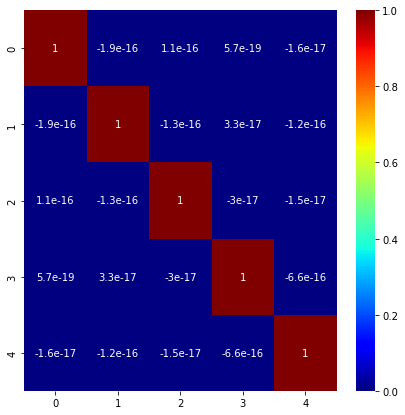

In [16]:
plt.figure(figsize=(7,7))
sns.heatmap( pd.DataFrame(X_pca).corr(), annot=True, cmap="jet" )

In [17]:
df.var()

mean radius                    12.418920
mean texture                   18.498909
mean perimeter                590.440480
mean area                  123843.554318
mean smoothness                 0.000198
mean compactness                0.002789
mean concavity                  0.006355
mean concave points             0.001506
mean symmetry                   0.000752
mean fractal dimension          0.000050
radius error                    0.076902
texture error                   0.304316
perimeter error                 4.087896
area error                   2069.431583
smoothness error                0.000009
compactness error               0.000321
concavity error                 0.000911
concave points error            0.000038
symmetry error                  0.000068
fractal dimension error         0.000007
worst radius                   23.360224
worst texture                  37.776483
worst perimeter              1129.130847
worst area                 324167.385102
worst smoothness

In [18]:
pd.DataFrame(X_pca).var()

0    443782.605147
1      7310.100062
2       703.833742
3        54.648738
4        39.890018
dtype: float64